In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [36]:
df = pd.read_excel("section_1.xlsx")
fist_5row = df#.head()

In [37]:
print(type(fist_5row))
fist_5row

<class 'pandas.core.frame.DataFrame'>


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,2015-04-04,2015-04-04,-24.7104,15,135.78,87537


In [38]:
dist_state = set(fist_5row['State or Province'])
print(dist_state)

{'Oklahoma', 'Colorado', 'Missouri', 'Texas', 'Iowa', 'Georgia', 'New Hampshire', 'Michigan', 'Tennessee', 'Indiana', 'Vermont', 'Rhode Island', 'Nebraska', 'New York', 'Massachusetts', 'West Virginia', 'Delaware', 'Connecticut', 'South Dakota', 'North Dakota', 'North Carolina', 'California', 'Washington', 'Maine', 'South Carolina', 'New Mexico', 'Mississippi', 'Utah', 'Florida', 'Nevada', 'Louisiana', 'Wyoming', 'New Jersey', 'Idaho', 'Kentucky', 'Virginia', 'Maryland', 'Kansas', 'Illinois', 'Ohio', 'Minnesota', 'Oregon', 'Arizona', 'Alabama', 'District of Columbia', 'Arkansas', 'Wisconsin', 'Montana', 'Pennsylvania'}


In [61]:
fist_5row= fist_5row[fist_5row['Region']=='East']

In [62]:
quantity = fist_5row['Quantity ordered new']
#print(quantity)

unit_price = fist_5row['Unit Price']
#print(unit_price)

states = fist_5row['State or Province']
cost = quantity*unit_price

#print(cost)

In [63]:
new_data = {
            "States" :states,
           "Cost" : cost
           }

In [64]:
new_df = pd.DataFrame(new_data)
new_df

,States,Cost
2,New Jersey,208.56
7,New York,30.94
8,New York,359.40
9,New York,17.88
10,New York,1159.90
...,...,...
1939,Ohio,14.90
1940,Ohio,755.94
1941,Ohio,26.10
1942,Ohio,888.30


In [65]:
new_df.to_excel("test_output.xlsx")

In [66]:
states = []
for cur_state in dist_state:
    states.append(cur_state.lower().strip())
print(states)

['oklahoma', 'colorado', 'missouri', 'texas', 'iowa', 'georgia', 'new hampshire', 'michigan', 'tennessee', 'indiana', 'vermont', 'rhode island', 'nebraska', 'new york', 'massachusetts', 'west virginia', 'delaware', 'connecticut', 'south dakota', 'north dakota', 'north carolina', 'california', 'washington', 'maine', 'south carolina', 'new mexico', 'mississippi', 'utah', 'florida', 'nevada', 'louisiana', 'wyoming', 'new jersey', 'idaho', 'kentucky', 'virginia', 'maryland', 'kansas', 'illinois', 'ohio', 'minnesota', 'oregon', 'arizona', 'alabama', 'district of columbia', 'arkansas', 'wisconsin', 'montana', 'pennsylvania']


In [67]:
newdf_States , newdf_Cost = new_df['States'],new_df['Cost']
costPerState = []
for searchState in states:
    total = 0
    for curState, curCost in zip(newdf_States , newdf_Cost):
        if curState.lower().strip() == searchState:
            total = curCost+total
            
    costPerState.append(total)
print(costPerState)

[0, 0, 0, 0, 0, 0, 7741.250000000001, 0, 0, 0, 14368.35, 11041.8, 0, 224947.5899999999, 61421.5, 10197.090000000002, 1391.76, 6673.41, 0, 0, 0, 0, 0, 32728.360000000004, 0, 0, 0, 0, 0, 0, 0, 0, 23407.899999999998, 0, 0, 0, 15844.009999999998, 0, 0, 70718.85, 0, 0, 0, 0, 68465.02, 0, 0, 0, 53585.71]


<BarContainer object of 49 artists>

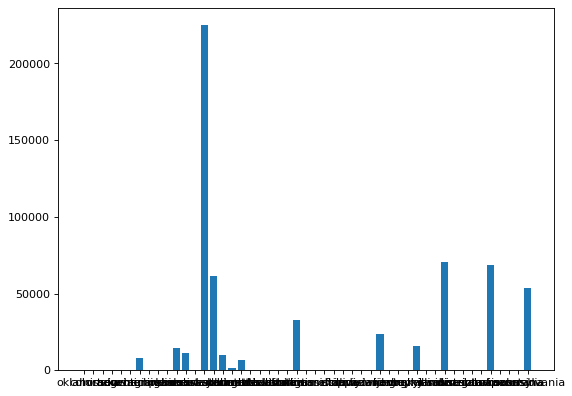

In [68]:
#!pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.bar(states,costPerState)

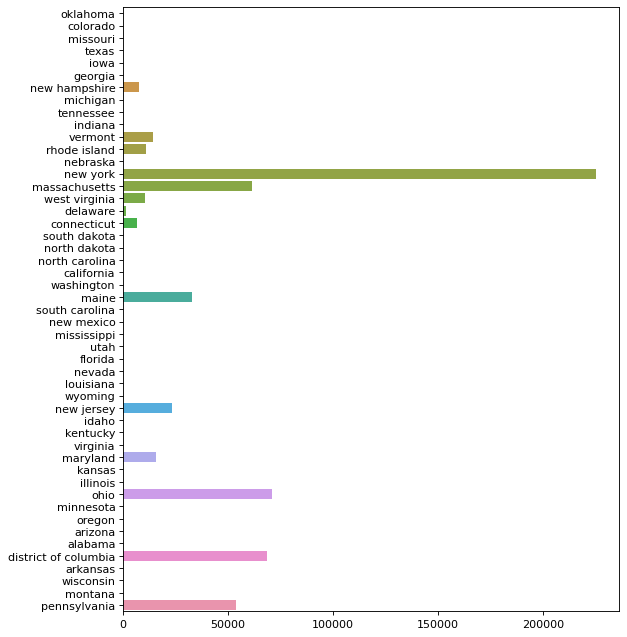

In [70]:
#!pip install seaborn
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 10), dpi=80)
sns.barplot(y = states,
            x = costPerState)
 
# Show the plot
plt.show()